<a href="https://colab.research.google.com/github/Dodaz/AH2179_HT24/blob/main/AH2179_EX7_Algot_Sjoholm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

# **TASK 1:Develop the neural network model for the bus arrival time delay prediction.​**
As discussed in the lecture, the bus arrival time delay prediction problem is modeled as a regression problem. The task will use the simple 2-layers fully connected neural network model as the example and guide you through the step-by-step process of the whole process of the model development.


## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [ ]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


How many rows and columns does the dataset contain?

In [ ]:
df.shape

(4962, 9)

Are any of the columns missing values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [ ]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

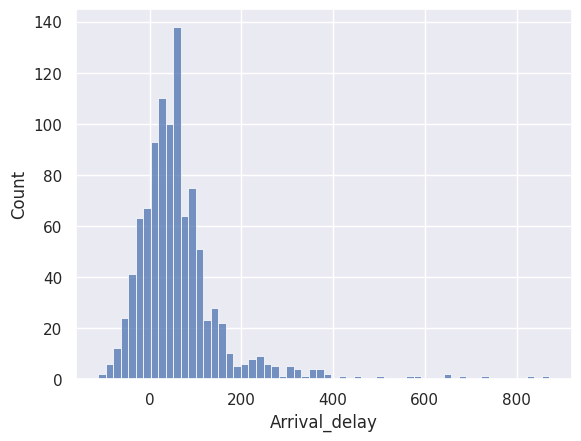

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])


Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [ ]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

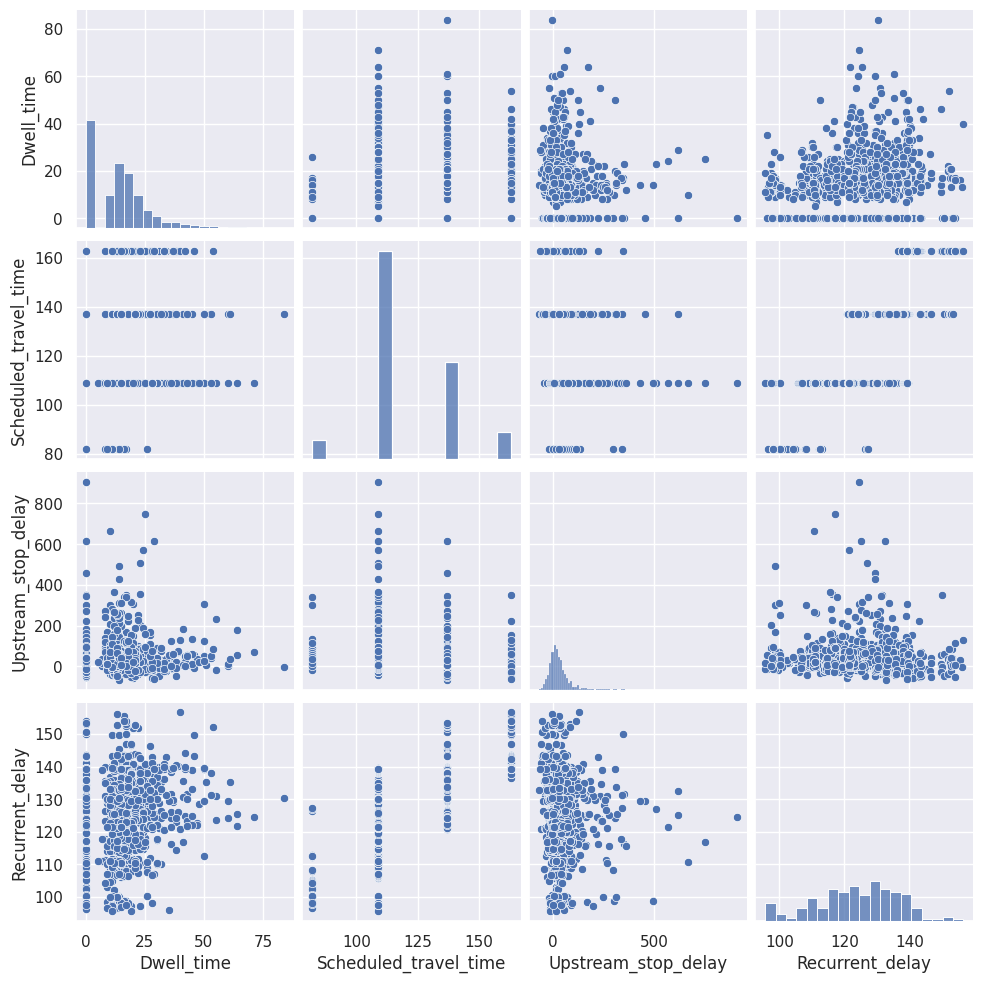

In [ ]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

## Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the neural network model with the training dataset and predict the values for the test dataset.

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 86.7260 - mae: 86.7260 - val_loss: 52.0100 - val_mae: 52.0100
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.2061 - mae: 52.2061 - val_loss: 39.2714 - val_mae: 39.2714
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.4956 - mae: 41.4956 - val_loss: 32.3680 - val_mae: 32.3680
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.1722 - mae: 31.1722 - val_loss: 34.1165 - val_mae: 34.1165
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.9565 - mae: 31.9565 - val_loss: 33.1330 - val_mae: 33.1330
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.8649 - mae: 31.8649 - val_loss: 32.6793 - val_mae: 32.6793
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.5089 - mae: 29.5089 - val_loss: 32.7628 - val_mae: 32.7628
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.8817 - mae: 30.8817 - val_loss: 32.8959 - val_mae: 32.8959
Epoch 9/200
20/20 ━━━━━━━━━━━━━

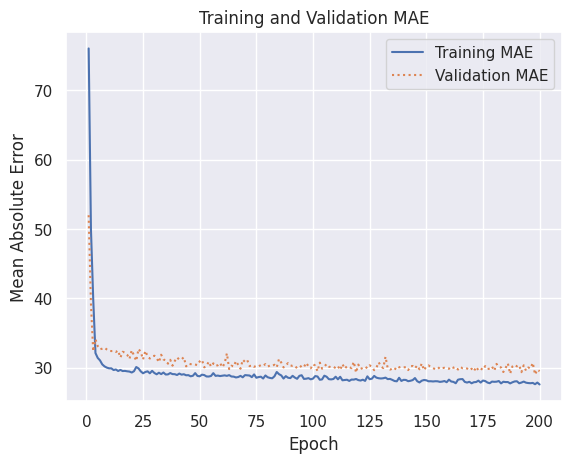

In [ ]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.773436464369297
Mean Squared Error: 1386.6650323428905
R-squared: 0.8824659975699852


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

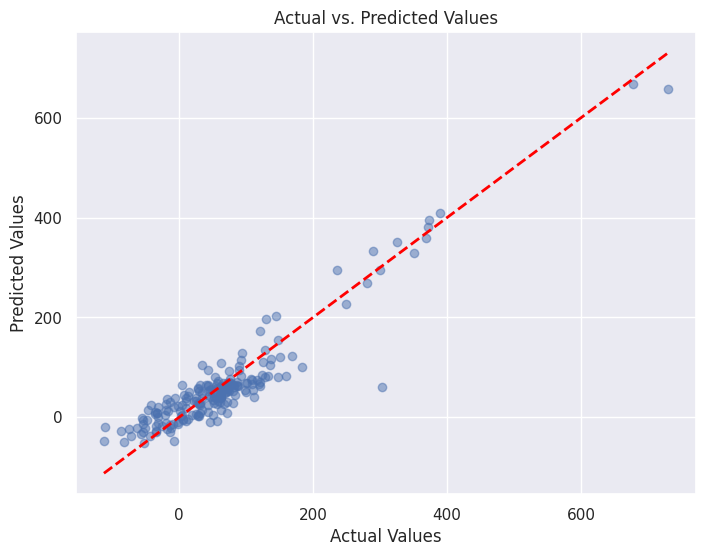

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Task 2: Practical NN training techniques**
The task will illustrate some useful NN training techniques, including saving and loading the trained model, using the callback function to save the best model, and adding dropout layers.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 46.72741, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 46.72741 to 38.80682, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 38.80682 to 33.20734, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 33.20734

Epoch 5: val_mae did not improve from 33.20734

Epoch 6: val_mae improved from 33.20734 to 32.65544, saving model to weights.best.h5.keras

Epoch 7: val_mae did not improve from 32.65544

Epoch 8: val_mae improved from 32.65544 to 32.23405, saving model to weights.best.h5.keras

Epoch 9: val_mae improved from 32.23405 to 32.18188, saving model to weights.best.h5.keras

Epoch 10: val_mae improved from 32.18188 to 32.10777, saving model to weights.best.h5.keras

Epoch 11: val_mae improved from 32.10777 to 31.14209, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 31.14209

Epoch 13: val_mae did not improve from 31.14209

Epoch 14: val_mae did no

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
--------------------------------------this is result of the trained model---------------------------------------------
Mean Absolute Error: 27.63458404570818
Mean Squared Error: 1404.1026829028485
R-squared: 0.8809879788592769
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
--------------------------------------this is result of the model loaded from the local path---------------------------------------------
Mean Absolute Error: 27.63458404570818
Mean Squared Error: 1404.1026829028485
R-squared: 0.8809879788592769


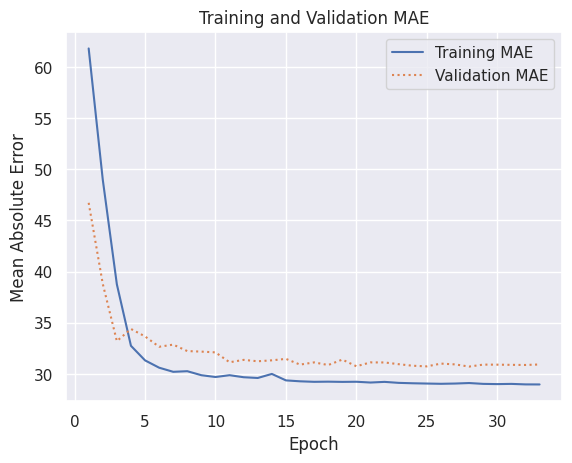

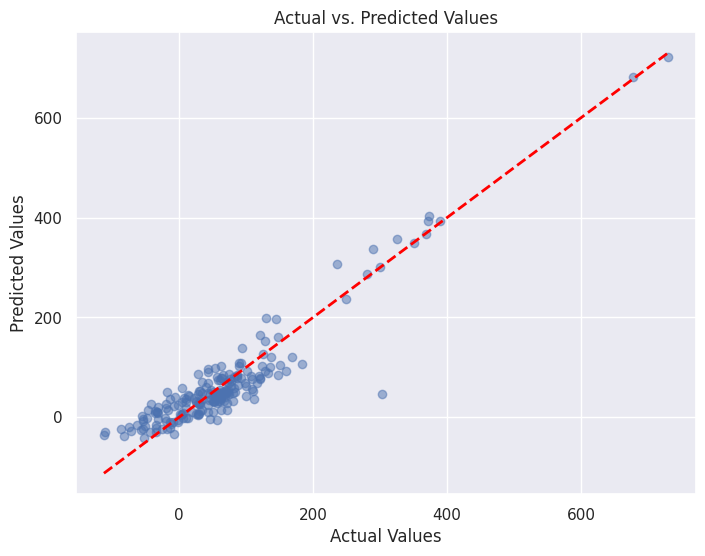

In [ ]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()


# **Task 3: Compare the results with a linear regression model**
The task involves comparing the results obtained from the neural network with those from the linear regression model, and we should analyze the reasons behind any differences in the outcomes.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
#df = df.iloc[:1000]

def time_to_float(date_str):
    date_format = '%d/%m/%Y %H:%M'
    date_obj = datetime.strptime(date_str, date_format)

    # Extract hours and minutes
    hours = date_obj.hour
    minutes = date_obj.minute

    # Convert time to float (hours + fractional minutes)
    return hours + minutes / 60

# Apply the function to create a new column
df['Arrival_time'] = df['Arrival_time'].apply(time_to_float)

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(256, activation='relu', input_dim=5))

# Add a Dropout layer with a dropout rate of 0.2.
model.add(Dropout(0.2))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(256, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.2.
model.add(Dropout(0.2))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=60, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

#model = load_model('weights.best.h5.keras');

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.73977, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.73977 to 27.35765, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.35765 to 26.66091, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.66091

Epoch 5: val_mae did not improve from 26.66091

Epoch 6: val_mae did not improve from 26.66091

Epoch 7: val_mae did not improve from 26.66091

Epoch 8: val_mae did not improve from 26.66091
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.402836715004273
Mean Squared Error: 1372.5641004689862
R-squared: 0.9226974844932556
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 28.590461074457842
Mean Squared Error of linear m

**In general, deep learning models tend to outperform linear regression models. Why is the performance of the neural network worse than that of the linear regression model? **

# **Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)**
Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
#df = df.iloc[:1000]
#df = df.sample(1000)

def time_to_float(date_str):
    date_format = '%d/%m/%Y %H:%M'
    date_obj = datetime.strptime(date_str, date_format)

    # Extract hours and minutes
    hours = date_obj.hour
    minutes = date_obj.minute

    # Convert time to float (hours + fractional minutes)
    return hours + minutes / 60

# Apply the function to create a new column
df['Arrival_time'] = df['Arrival_time'].apply(time_to_float)

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------
for u1 in [32, 64, 128, 256, 512]: #[10, 20, 40, 60, 80, 100]:
  for u2 in [32, 64, 128, 256, 512]:#[10, 50, 100]:
#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
    # Create a Sequential model, which is a linear stack of layers.
    model = Sequential()

    # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
    model.add(Dense(256, activation='relu', input_dim=5))

    # # Add a Dropout layer with a dropout rate of 0.2.
    model.add(Dropout(0.2))

    # Add another Dense layer with 64 units and ReLU activation.
    model.add(Dense(64, activation='relu'))

    # # Add another Dropout layer with a dropout rate of 0.2.
    model.add(Dropout(0.2))

    # Add a final Dense layer with 1 unit (typically used for regression tasks).
    model.add(Dense(1))

    # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
    # and MAE metric to be used during training.
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    #************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

    #-------------------------------------------------model train------------------------------------------------------------------
    #************************************************Here you can use the callback function **************
    # use the callback function to early stop, learning rate ajusting, save the best model
    # Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
    # It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
    early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

    # Create a ReduceLROnPlateau callback to monitor val_mae.
    # It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

    # Define the file path where the best model weights will be saved.
    filepath = "weights.best.h5.keras"
    # Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
    # The callback will save the model's weights only if the validation mae improves.
    checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    # Train the model using the fit method.
    hist = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=60, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

    #************************************************Here you can choose to use the callback function *************
    '''
    # Set the style of the plots using seaborn.
    sns.set()

    # Extract the training and validation Mean Absolute Error (MAE) from the training history.
    err = hist.history['mae']
    val_err = hist.history['val_mae']

    # Define the number of epochs.
    epochs = range(1, len(err) + 1)

    # Plot the Training MAE and Validation MAE over epochs.
    plt.plot(epochs, err, '-', label='Training MAE')
    plt.plot(epochs, val_err, ':', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.plot()'''

    # Use the trained model to predict on the test data.
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics.
    print(f"Layer 1 Units: {u1}")
    print(f"Layer 2 Units: {u2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.49016, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.49016 to 27.33074, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.33074 to 26.78551, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.78551

Epoch 5: val_mae did not improve from 26.78551

Epoch 6: val_mae did not improve from 26.78551

Epoch 7: val_mae did not improve from 26.78551

Epoch 8: val_mae did not improve from 26.78551
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Layer 1 Units: 32
Layer 2 Units: 32
Mean Absolute Error: 28.86822557845106
Mean Squared Error: 1425.9507898716374
R-squared: 0.9196907877922058


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 30.69632, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 30.69632 to 27.36573, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.36573

Epoch 4: val_mae improved from 27.36573 to 26.81747, saving model to weights.best.h5.keras

Epoch 5: val_mae did not improve from 26.81747

Epoch 6: val_mae did not improve from 26.81747

Epoch 7: val_mae did not improve from 26.81747

Epoch 8: val_mae did not improve from 26.81747

Epoch 9: val_mae improved from 26.81747 to 26.67893, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 26.67893

Epoch 11: val_mae improved from 26.67893 to 26.67733, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.67733

Epoch 13: val_mae did not improve from 26.67733

Epoch 14: val_mae did not improve from 26.67733

Epoch 15: val_mae did not improve from 26.67733

Epoch 16: val_mae improved from 26.67733 to 26.59853, savi

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.46942, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.46942 to 27.58322, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.58322

Epoch 4: val_mae improved from 27.58322 to 27.43507, saving model to weights.best.h5.keras

Epoch 5: val_mae improved from 27.43507 to 26.54938, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.54938

Epoch 7: val_mae did not improve from 26.54938

Epoch 8: val_mae improved from 26.54938 to 26.46647, saving model to weights.best.h5.keras

Epoch 9: val_mae did not improve from 26.46647

Epoch 10: val_mae did not improve from 26.46647

Epoch 11: val_mae improved from 26.46647 to 26.34733, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.34733

Epoch 13: val_mae did not improve from 26.34733

Epoch 14: val_mae did not improve from 26.34733

Epoch 15: val_mae did not improve from 26.34733

Epoch 16: val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.12636, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.12636 to 27.20264, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.20264

Epoch 4: val_mae did not improve from 27.20264

Epoch 5: val_mae improved from 27.20264 to 26.72604, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.72604

Epoch 7: val_mae did not improve from 26.72604

Epoch 8: val_mae did not improve from 26.72604

Epoch 9: val_mae did not improve from 26.72604

Epoch 10: val_mae did not improve from 26.72604
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Layer 1 Units: 32
Layer 2 Units: 256
Mean Absolute Error: 28.50924173815989
Mean Squared Error: 1413.0467161134886
R-squared: 0.9204174876213074


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.01691, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.01691 to 27.68009, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.68009

Epoch 4: val_mae improved from 27.68009 to 26.80608, saving model to weights.best.h5.keras

Epoch 5: val_mae improved from 26.80608 to 26.74316, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.74316

Epoch 7: val_mae improved from 26.74316 to 26.64721, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.64721

Epoch 9: val_mae did not improve from 26.64721

Epoch 10: val_mae did not improve from 26.64721

Epoch 11: val_mae did not improve from 26.64721

Epoch 12: val_mae improved from 26.64721 to 26.61003, saving model to weights.best.h5.keras

Epoch 13: val_mae did not improve from 26.61003

Epoch 14: val_mae did not improve from 26.61003

Epoch 15: val_mae did not improve from 26.61003

Epoch 16: val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.30723, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.30723 to 26.50448, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 26.50448

Epoch 4: val_mae did not improve from 26.50448

Epoch 5: val_mae did not improve from 26.50448

Epoch 6: val_mae did not improve from 26.50448

Epoch 7: val_mae did not improve from 26.50448
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Layer 1 Units: 64
Layer 2 Units: 32
Mean Absolute Error: 28.55428565112158
Mean Squared Error: 1420.045274965678
R-squared: 0.9200233817100525


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 30.39890, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 30.39890 to 27.51253, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.51253

Epoch 4: val_mae did not improve from 27.51253

Epoch 5: val_mae improved from 27.51253 to 27.43197, saving model to weights.best.h5.keras

Epoch 6: val_mae improved from 27.43197 to 26.67855, saving model to weights.best.h5.keras

Epoch 7: val_mae improved from 26.67855 to 26.67388, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.67388

Epoch 9: val_mae did not improve from 26.67388

Epoch 10: val_mae did not improve from 26.67388

Epoch 11: val_mae improved from 26.67388 to 26.51871, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.51871

Epoch 13: val_mae did not improve from 26.51871

Epoch 14: val_mae did not improve from 26.51871

Epoch 15: val_mae improved from 26.51871 to 26.50150, saving mo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.31343, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.31343 to 27.61762, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.61762 to 26.72465, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.72465

Epoch 5: val_mae did not improve from 26.72465

Epoch 6: val_mae did not improve from 26.72465

Epoch 7: val_mae did not improve from 26.72465

Epoch 8: val_mae did not improve from 26.72465
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Layer 1 Units: 64
Layer 2 Units: 128
Mean Absolute Error: 28.61263799475472
Mean Squared Error: 1460.4159830095523
R-squared: 0.9177497029304504


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 27.70624, saving model to weights.best.h5.keras

Epoch 2: val_mae did not improve from 27.70624

Epoch 3: val_mae did not improve from 27.70624

Epoch 4: val_mae did not improve from 27.70624

Epoch 5: val_mae improved from 27.70624 to 26.84681, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.84681

Epoch 7: val_mae improved from 26.84681 to 26.74073, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.74073

Epoch 9: val_mae improved from 26.74073 to 26.67081, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 26.67081

Epoch 11: val_mae improved from 26.67081 to 26.58961, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.58961

Epoch 13: val_mae did not improve from 26.58961

Epoch 14: val_mae improved from 26.58961 to 26.52541, saving model to weights.best.h5.keras

Epoch 15: val_mae did not improve from 26.52541

Epoch 16: val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.99639, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.99639 to 28.16954, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 28.16954 to 26.92922, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.92922

Epoch 5: val_mae did not improve from 26.92922

Epoch 6: val_mae improved from 26.92922 to 26.83167, saving model to weights.best.h5.keras

Epoch 7: val_mae did not improve from 26.83167

Epoch 8: val_mae did not improve from 26.83167

Epoch 9: val_mae did not improve from 26.83167

Epoch 10: val_mae did not improve from 26.83167

Epoch 11: val_mae improved from 26.83167 to 26.49770, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.49770

Epoch 13: val_mae did not improve from 26.49770

Epoch 14: val_mae did not improve from 26.49770

Epoch 15: val_mae did not improve from 26.49770

Epoch 16: val_mae did not improve from 26.49770
16/16 ━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.61225, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.61225 to 27.32350, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.32350

Epoch 4: val_mae improved from 27.32350 to 26.82954, saving model to weights.best.h5.keras

Epoch 5: val_mae did not improve from 26.82954

Epoch 6: val_mae did not improve from 26.82954

Epoch 7: val_mae did not improve from 26.82954

Epoch 8: val_mae did not improve from 26.82954

Epoch 9: val_mae did not improve from 26.82954
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Layer 1 Units: 128
Layer 2 Units: 32
Mean Absolute Error: 28.567823707097972
Mean Squared Error: 1459.0162662988255
R-squared: 0.9178285002708435


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.14710, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.14710 to 27.06856, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.06856 to 26.92425, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.92425

Epoch 5: val_mae did not improve from 26.92425

Epoch 6: val_mae did not improve from 26.92425

Epoch 7: val_mae improved from 26.92425 to 26.85618, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.85618

Epoch 9: val_mae improved from 26.85618 to 26.64784, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 26.64784

Epoch 11: val_mae did not improve from 26.64784

Epoch 12: val_mae did not improve from 26.64784

Epoch 13: val_mae improved from 26.64784 to 26.56046, saving model to weights.best.h5.keras

Epoch 14: val_mae did not improve from 26.56046

Epoch 15: val_mae did not improve from 26.56046

Epoch 16: val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.15976, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.15976 to 27.41451, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.41451

Epoch 4: val_mae improved from 27.41451 to 26.85841, saving model to weights.best.h5.keras

Epoch 5: val_mae did not improve from 26.85841

Epoch 6: val_mae improved from 26.85841 to 26.79813, saving model to weights.best.h5.keras

Epoch 7: val_mae improved from 26.79813 to 26.76250, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.76250

Epoch 9: val_mae did not improve from 26.76250

Epoch 10: val_mae did not improve from 26.76250

Epoch 11: val_mae did not improve from 26.76250

Epoch 12: val_mae did not improve from 26.76250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Layer 1 Units: 128
Layer 2 Units: 128
Mean Absolute Error: 28.65044952549745
Mean Squared Error: 1431.301983586822
R-squared: 0.9193893671035767


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.11254, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.11254 to 27.42001, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.42001 to 27.22357, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 27.22357

Epoch 5: val_mae did not improve from 27.22357

Epoch 6: val_mae improved from 27.22357 to 27.15136, saving model to weights.best.h5.keras

Epoch 7: val_mae improved from 27.15136 to 26.86643, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.86643

Epoch 9: val_mae did not improve from 26.86643

Epoch 10: val_mae improved from 26.86643 to 26.37637, saving model to weights.best.h5.keras

Epoch 11: val_mae did not improve from 26.37637

Epoch 12: val_mae did not improve from 26.37637

Epoch 13: val_mae did not improve from 26.37637

Epoch 14: val_mae did not improve from 26.37637

Epoch 15: val_mae did not improve from 26.37637
16/16 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.34058, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.34058 to 26.99276, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 26.99276 to 26.83862, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.83862

Epoch 5: val_mae did not improve from 26.83862

Epoch 6: val_mae did not improve from 26.83862

Epoch 7: val_mae did not improve from 26.83862

Epoch 8: val_mae did not improve from 26.83862
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Layer 1 Units: 128
Layer 2 Units: 512
Mean Absolute Error: 28.4557819860562
Mean Squared Error: 1407.6844572951522
R-squared: 0.9207195043563843


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.25418, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.25418 to 27.59472, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.59472

Epoch 4: val_mae improved from 27.59472 to 26.91869, saving model to weights.best.h5.keras

Epoch 5: val_mae improved from 26.91869 to 26.79120, saving model to weights.best.h5.keras

Epoch 6: val_mae improved from 26.79120 to 26.63520, saving model to weights.best.h5.keras

Epoch 7: val_mae did not improve from 26.63520

Epoch 8: val_mae did not improve from 26.63520

Epoch 9: val_mae did not improve from 26.63520

Epoch 10: val_mae did not improve from 26.63520

Epoch 11: val_mae improved from 26.63520 to 26.46554, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 26.46554

Epoch 13: val_mae did not improve from 26.46554

Epoch 14: val_mae did not improve from 26.46554

Epoch 15: val_mae improved from 26.46554 to 26.39607, saving mo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.93379, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.93379 to 28.04734, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 28.04734 to 27.97212, saving model to weights.best.h5.keras

Epoch 4: val_mae improved from 27.97212 to 26.71117, saving model to weights.best.h5.keras

Epoch 5: val_mae did not improve from 26.71117

Epoch 6: val_mae did not improve from 26.71117

Epoch 7: val_mae did not improve from 26.71117

Epoch 8: val_mae did not improve from 26.71117

Epoch 9: val_mae did not improve from 26.71117
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Layer 1 Units: 256
Layer 2 Units: 64
Mean Absolute Error: 28.39626435939245
Mean Squared Error: 1437.4452066496624
R-squared: 0.9190434217453003


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 28.27627, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 28.27627 to 28.01745, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 28.01745

Epoch 4: val_mae improved from 28.01745 to 27.59704, saving model to weights.best.h5.keras

Epoch 5: val_mae did not improve from 27.59704

Epoch 6: val_mae improved from 27.59704 to 26.76033, saving model to weights.best.h5.keras

Epoch 7: val_mae did not improve from 26.76033

Epoch 8: val_mae did not improve from 26.76033

Epoch 9: val_mae did not improve from 26.76033

Epoch 10: val_mae did not improve from 26.76033

Epoch 11: val_mae did not improve from 26.76033
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Layer 1 Units: 256
Layer 2 Units: 128
Mean Absolute Error: 28.700722141809745
Mean Squared Error: 1409.236023640948
R-squared: 0.9206321239471436


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.80571, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.80571 to 27.73593, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.73593 to 27.20757, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 27.20757

Epoch 5: val_mae improved from 27.20757 to 27.17430, saving model to weights.best.h5.keras

Epoch 6: val_mae improved from 27.17430 to 26.98311, saving model to weights.best.h5.keras

Epoch 7: val_mae did not improve from 26.98311

Epoch 8: val_mae did not improve from 26.98311

Epoch 9: val_mae improved from 26.98311 to 26.82076, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 26.82076

Epoch 11: val_mae did not improve from 26.82076

Epoch 12: val_mae improved from 26.82076 to 26.55168, saving model to weights.best.h5.keras

Epoch 13: val_mae did not improve from 26.55168

Epoch 14: val_mae did not improve from 26.55168

Epoch 15: val_mae i

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.75936, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.75936 to 28.17661, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 28.17661 to 26.97496, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.97496

Epoch 5: val_mae did not improve from 26.97496

Epoch 6: val_mae did not improve from 26.97496

Epoch 7: val_mae did not improve from 26.97496

Epoch 8: val_mae improved from 26.97496 to 26.74573, saving model to weights.best.h5.keras

Epoch 9: val_mae improved from 26.74573 to 26.63490, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 26.63490

Epoch 11: val_mae did not improve from 26.63490

Epoch 12: val_mae did not improve from 26.63490

Epoch 13: val_mae improved from 26.63490 to 26.53025, saving model to weights.best.h5.keras

Epoch 14: val_mae did not improve from 26.53025

Epoch 15: val_mae did not improve from 26.53025

Epoch 16: val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 27.64612, saving model to weights.best.h5.keras

Epoch 2: val_mae did not improve from 27.64612

Epoch 3: val_mae improved from 27.64612 to 27.24076, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 27.24076

Epoch 5: val_mae did not improve from 27.24076

Epoch 6: val_mae did not improve from 27.24076

Epoch 7: val_mae improved from 27.24076 to 26.84643, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.84643

Epoch 9: val_mae improved from 26.84643 to 26.53784, saving model to weights.best.h5.keras

Epoch 10: val_mae improved from 26.53784 to 26.49228, saving model to weights.best.h5.keras

Epoch 11: val_mae did not improve from 26.49228

Epoch 12: val_mae did not improve from 26.49228

Epoch 13: val_mae did not improve from 26.49228

Epoch 14: val_mae did not improve from 26.49228

Epoch 15: val_mae did not improve from 26.49228
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Layer 1 Units: 512


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.15552, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.15552 to 27.50292, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.50292 to 27.07755, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 27.07755

Epoch 5: val_mae improved from 27.07755 to 26.86340, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.86340

Epoch 7: val_mae did not improve from 26.86340

Epoch 8: val_mae improved from 26.86340 to 26.59521, saving model to weights.best.h5.keras

Epoch 9: val_mae did not improve from 26.59521

Epoch 10: val_mae did not improve from 26.59521

Epoch 11: val_mae did not improve from 26.59521

Epoch 12: val_mae did not improve from 26.59521

Epoch 13: val_mae did not improve from 26.59521
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Layer 1 Units: 512
Layer 2 Units: 64
Mean Absolute Error: 28.165534424829772
Mean Squared Error: 1407.429419567135
R-s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.61716, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.61716 to 27.33056, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 27.33056

Epoch 4: val_mae did not improve from 27.33056

Epoch 5: val_mae improved from 27.33056 to 26.71756, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.71756

Epoch 7: val_mae did not improve from 26.71756

Epoch 8: val_mae did not improve from 26.71756

Epoch 9: val_mae did not improve from 26.71756

Epoch 10: val_mae did not improve from 26.71756
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Layer 1 Units: 512
Layer 2 Units: 128
Mean Absolute Error: 28.650026834166987
Mean Squared Error: 1389.0837526282712
R-squared: 0.9217671155929565


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 29.61698, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 29.61698 to 27.60548, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 27.60548 to 26.73417, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 26.73417

Epoch 5: val_mae did not improve from 26.73417

Epoch 6: val_mae did not improve from 26.73417

Epoch 7: val_mae improved from 26.73417 to 26.69151, saving model to weights.best.h5.keras

Epoch 8: val_mae did not improve from 26.69151

Epoch 9: val_mae did not improve from 26.69151

Epoch 10: val_mae improved from 26.69151 to 26.57397, saving model to weights.best.h5.keras

Epoch 11: val_mae did not improve from 26.57397

Epoch 12: val_mae did not improve from 26.57397

Epoch 13: val_mae did not improve from 26.57397

Epoch 14: val_mae did not improve from 26.57397

Epoch 15: val_mae did not improve from 26.57397
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Layer 1 Units: 512


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 27.96779, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 27.96779 to 26.96670, saving model to weights.best.h5.keras

Epoch 3: val_mae did not improve from 26.96670

Epoch 4: val_mae did not improve from 26.96670

Epoch 5: val_mae improved from 26.96670 to 26.55644, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 26.55644

Epoch 7: val_mae did not improve from 26.55644

Epoch 8: val_mae did not improve from 26.55644

Epoch 9: val_mae did not improve from 26.55644

Epoch 10: val_mae did not improve from 26.55644
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Layer 1 Units: 512
Layer 2 Units: 512
Mean Absolute Error: 28.471454176751962
Mean Squared Error: 1423.1391008751837
R-squared: 0.9198490977287292
